# Data Storytelling in Research
  
#### **Robert Ritz**  
Data Scientist  
Director, LETU Mongolia  
robert@letumongolia.com  
robertritz@ider.edu.mn  
github.com/robertritz

<img src="assets/mongolian-data-stories.png" width=800 />

<img src="assets/pm25.png" width=800 />

## Issues With Pollution Prediction
- Do people actually want to know the forecast?
- What do these AQ categories mean?
- Air quality is bad, so what?

Data Science and its multidisciplinary approach is very similar to the approach journalists must take to tackle data journalism. However, domain knowledge in the form of journalistic experience is often not enough.

## Drew Conway's Data Science Venn Diagram
<img src='assets/Data_Science_VD.png' width='600' />

## Data Analysis Process
1. Define problem and scope
2. Find data
3. Clean, transform data
4. Exploratory data analysis (EDA)
5. Communicate and interpret results

## Problems with academic research process
- Too much focus on process
- Too little focus on communication
- Rigid rules for interpretation
- Lack of focus on impact

# Some of My Work

# Chronic Youth Unemployment
## Hypothesis: Unemployment is distributed evenly throughout the population.

## Data: 1212.mn
- UNEMPLOYED RATE, by sex, age group
- 38 different tables in the **Labour force, unemployment** category


## Challenge: Data isn't always in the right format
<img src="assets/unemployment-tabular.PNG" width=1200 />

## Tool: PowerQuery in Excel
- Alternatives: Python, R, OpenRefine

<img src="assets/1212-unpivot.gif" width=800 />

## Using Pandas to import the data

In [1]:
import pandas as pd
unemployment = pd.read_csv("assets/1212-unemployment-gender.csv")
unemployment.head()

,Age group,Sex,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Total,Total,11.6,9.9,7.7,8.2,7.9,7.9,7.5,10.0,8.8
1,Total,Male,11.6,10.5,8.1,8.4,7.6,8.5,8.2,11.6,9.6
2,Total,Female,11.6,9.2,7.4,8.1,8.3,7.3,6.7,8.2,7.8
3,15-19,Total,22.8,18.0,14.0,8.0,13.6,17.4,18.8,24.6,24.8
4,15-19,Male,23.1,17.5,14.6,6.9,11.1,16.2,17.4,22.2,18.8


## Unpivot by melting

In [16]:
unemployment_unpivot = pd.melt(unemployment, id_vars=['Age group', 'Sex'], var_name=['year'])
unemployment_unpivot.head(10)

,Age group,Sex,year,value
0,Total,Total,2009,11.6
1,Total,Male,2009,11.6
2,Total,Female,2009,11.6
3,15-19,Total,2009,22.8
4,15-19,Male,2009,23.1
5,15-19,Female,2009,22.4
6,20-24,Total,2009,21.7
7,20-24,Male,2009,21.0
8,20-24,Female,2009,22.6
9,25-29,Total,2009,12.2


# After some digging and playing around...

<img src="assets/unemployment.png" width=900 />

## Tools Used
- Excel for cleansing and EDA
- Data Illustrator
    - Joint venture by Adobe and Georgia Tech
    - Balances ease of use like Tableau with the customizability of Adobe Illustrator

<img src="assets/data-illustrator.PNG" width=600 />

# Goats are Taking Over the Steppe

## Hypothesis: Herd size and composition has had a large impact on Mongolian rangeland.
- Is climate change the only thing responsible for land degradation?
- Are herders better off today than before?

## Data: 1212.mn
- 
NUMBER OF LIVESTOCK, by type, by region, soum, aimag and the Capital

<img src="assets/animal-percent.png" width=1100 />

<img src="assets/animal-numbers.png" width=1200 />

## Challenges and additional questions
- How do we know data before 1991 was accurate?
- If herd numbers are growing so much, why is there so much migration to UB?
- Goats are the problem.....right?

- What more data do we need to answer our new questions?
- Ulaanbaatar migration data. How many people move to UB from the countryside?
- UB migration ban until 2020
- We can't analyze what we can't measure.

# Crime Dashboard
## Data: http://crimemap.police.gov.mn
- 2015 and 2016 appeared complete
- 2013, 2014, and 2017 seem to be missing a lot of data

<img src="assets/crimemap.png" width=600 />

## Hypothesis: Mongolia has a lower murder rate than the United States.
- Is the murder rate (murders/100,000 people) higher or lower than the US?

## Poll: In 2016 was the Mongolian murder rate higher than the United States murder rate?

## 2016 Mongolia murder rate*: 5.72 (5.66 according to UN-CTS)
## 2016 US murder rate: 5.35
- Note*: UN-CTS reported 171 murders in 2016. Crimemap reported 173.  
- Source: UN-CTS and crimemap.police.gov.mn
- 2016 data became available in June this year.

## Google Data Studio
- Crime data scraped from crimemap.police.gov.mn
- Combined population statistics with crime data
- Tool was originally meant for YouTube channel analytics

<img src="assets/murders.PNG" width=1200 />

<img src="assets/crime-rate.png" width=1200 />

## Challenges
- Limited in what we can analyze from this data.
    - Lack of detailed information about crime.
    - Who was the victim? Theft has four categories, assault has one.
- Was it closed or not? Did it lead to a prosecution?
- Data doesn't seem to be added consistently after 2016.
- Only works 50% of the time.

# Outstanding Loans
## Hypothesis: Debt is becoming unsustainable in Mongolia.
- How is debt spread around the country?
- How are deposits and outstanding loans correlated?

## Data: 1212.mn
## Tool: Tableau

<img src="assets/outstanding-loans.png" width=1200 />

## Challenge
- Map outstanding loans by aimag
- Raw numbers didn't feel enough
- Per capita (outstanding loans per person)

<img src="assets/loans_map.png" width=1100 />

## Challenge:
- What do these numbers mean?
- These are not disaggregated by private or business loans.
- Ulaanbaatar is the economic center. Are banks unwilling to give loans for countryside citizens?

# Tsagaan Sar Debt
## Hypothesis: People get more loans right before Tsagaan Sar.

## Data: Mongol Bank
## Tools: Python and Facebook's Prophet

### Full code to produce results

In [2]:
#Import required libraries
import pandas as pd
from fbprophet import Prophet 
import matplotlib.pyplot as plt
%matplotlib inline

#Load data
df = pd.read_csv('data/loans.csv', header=0, names=['date','salary','pension'])

In [3]:
df.head(10)

,date,salary,pension
0,12/31/2008,37547.56092,43616.02673
1,3/31/2009,30640.04101,55241.52788
2,6/30/2009,43947.97785,46022.47222
3,9/30/2009,76677.81398,52476.63136
4,12/31/2009,51307.13591,43371.51284
5,3/31/2010,58950.04688,52612.07351
6,6/30/2010,92872.42111,46837.86520
7,9/30/2010,116903.32770,50185.77887
8,12/31/2010,111685.94790,62613.92135
9,3/31/2011,208644.84980,82509.17204


In [4]:
df['date'] = pd.to_datetime(df['date'])
pension = df[['date','pension']].rename(columns={'date':'ds','pension':'y'})

### Fitting a Prophet Model

In [5]:
m = Prophet(yearly_seasonality=4)
m.add_seasonality(name='quarterly', period=30.5, fourier_order=5)
m.fit(pension)

C:\Users\rober\Anaconda3\envs\standard\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\rober\Anaconda3\envs\standard\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [6]:
# Make future periods
future = m.make_future_dataframe(periods=8, freq='Q')

# Make forecast from fitted model
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43,2019-09-30,317393.418488,289992.885495,347549.374397
44,2019-12-31,300926.311152,272304.755176,330223.397244
45,2020-03-31,353513.007013,323609.687335,382599.552508
46,2020-06-30,335064.998330,307512.211872,364689.373611
47,2020-09-30,345002.350752,317498.907990,372318.799900


C:\Users\rober\Anaconda3\envs\standard\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


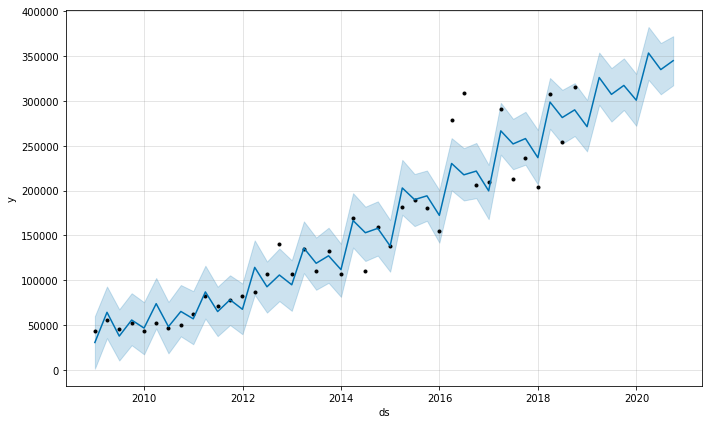

In [7]:
fig1 = m.plot(forecast)

Text(736400, 20000, 'Pension Loan Cycle')

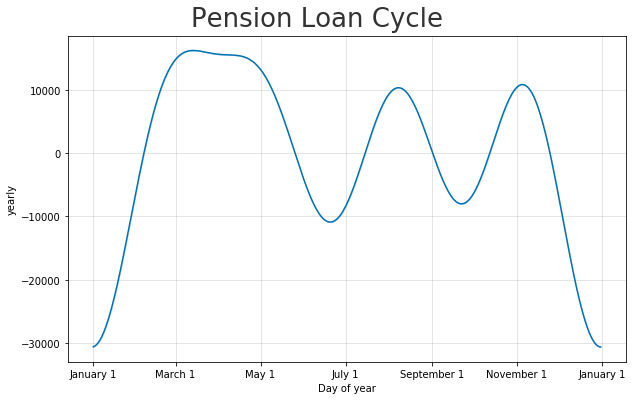

In [9]:
from fbprophet.plot import plot_yearly
b = plot_yearly(m)
plt.text(x = 736400, y = 20000, s = 'Pension Loan Cycle', fontsize=26, alpha=.8)

# Tools for everyone
- Data Illustrator, data-illustrator.com - FREE
- Tableau Public is FREE for all
- Google Data Studio, out of beta - FREE

## Advanced Analysis Tools
- D3
- Pandas, Numpy (Python)
- Dplyr, tidyr (R)
- Matplotlib, Seaborn, Bokeh, Plotly

## Web Skills
- HTML
- CSS
- Javascript
- Django

# How do I know your results are valid?
- Have you tried to reproduce the results of a research paper?
- Can you even get the data?
- If you can't reproduce the results is the paper valid?

# Jupyter Notebooks
"Open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text."  
-Jupyter.org

- #1 Data Science Environment
- Supports many programming languages (including R and Python)
- Your entire research paper can live in a notebook.

## Reproducibility
**Can you retrace every step you took to create your paper?**
- End to end research workflow
    - Write, visualize, and analyze in one place
- Be able to prove each step of your analysis
- Easily share your work with others over Github or elsewhere

Import scraped crime data from http://crimemap.police.gov.mn and store to crimes dataframe.

In [19]:
import pandas as pd
crimes = pd.read_excel("assets/Mongolia Crime Data Cleaned.xlsx")

In [20]:
# Take a look at head of dataframe to understand the features we have.
crimes.head()

,Гэмт хэргийн төрөл,Хэргийн дугаар,Хэргийн огноо,Хэргийн байршил,Хот/Аймаг,Дүүрэг,Хороо/Сум,Шалгасан ЦХ
0,Бусдын бие махбодид гэмтэл учруулах,2.014260e+12,2014-07-01,"Хан-Уул, 15-р хороо, жапан таун,",Улаанбаатар,Хан-Уул,15-р хороо,Хан-Уул дүүрэг дэх цагдаагийн 1-р хэлтэс
1,Бусдын бие махбодид гэмтэл учруулах,2.014260e+12,2014-07-01,"Баянгол дүүрэг, 1-р хороо,",Улаанбаатар,Баянгол дүүрэг,1-р хороо,Баянгол дүүрэг дэх цагдаагийн 2-р хэлтэс
2,Бусдын бие махбодид гэмтэл учруулах,2.014260e+12,2014-07-01,"Хан-Уул, 10-р хороо,",Улаанбаатар,Хан-Уул,10-р хороо,Хан-Уул дүүрэг дэх цагдаагийн 2-р хэлтэс
3,Бусдын бие махбодид гэмтэл учруулах,2.014260e+12,2014-07-01,"Баянгол дүүрэг, 17-р хороо,",Улаанбаатар,Баянгол дүүрэг,17-р хороо,Баянгол дүүрэг дэх цагдаагийн 1-р хэлтэс
4,Хулгайлах - Иргэдийн өмч,2.014250e+12,2014-07-01,"Чингэлтэй дүүрэг, 12-р хороо, булгийн,",Улаанбаатар,Чингэлтэй дүүрэг,12-р хороо,Чингэлтэй дүүрэг дэх цагдаагийн 2-р хэлтэс


What are the unique crime categories? We are looking for "murder" or "intentional homicide".

In [21]:
crimes['Гэмт хэргийн төрөл'].unique()

array(['Бусдын бие махбодид гэмтэл учруулах', 'Хулгайлах - Иргэдийн өмч',
       'ТХХАББАЖЗ', 'Хулгайлах - Тээврийн хэрэгсэл', 'Танхайрах',
       'Булаах', 'Хулгайлах - Мал', 'Хүчиндэх', 'Дээрэмдэх',
       'Хулгайлах - Халаас', 'Хүнийг санаатай алах', nan], dtype=object)

We found the murder category. It is called "Хүнийг санаатай алах". How many murders were there in 2016?

In [66]:
murder_2016 = crimes[(crimes['Гэмт хэргийн төрөл'] == 'Хүнийг санаатай алах') & (crimes['Хэргийн огноо'].dt.year == 2016)]
murder_2016 = murder_2016.reset_index(drop=True)
print("There were", len(murder_2016.index), "murders in Mongolia in 2016.")

There were 173 murders in Mongolia in 2016.


## Your colleague says, "A visual showing murders each month will have more impact."

Find the number of murders each month.

In [85]:
murder_2016['Хэргийн дугаар'].groupby(murder_2016['Хэргийн огноо'].dt.month).agg('count')

Хэргийн огноо
1     12
2     13
3     11
4     12
5     16
6     12
7     17
8     13
9     11
10    19
11    18
12    19
Name: Хэргийн дугаар, dtype: int64

Import Matplotlib and use magic to show plots inline

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

Assign month names to "x" values and murder totals for each month to "y" values. 

In [94]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = murder_2016['Хэргийн дугаар'].groupby(murder_2016['Хэргийн огноо'].dt.month).agg('count')

Build the plot and assign titles and labels.

<BarContainer object of 12 artists>

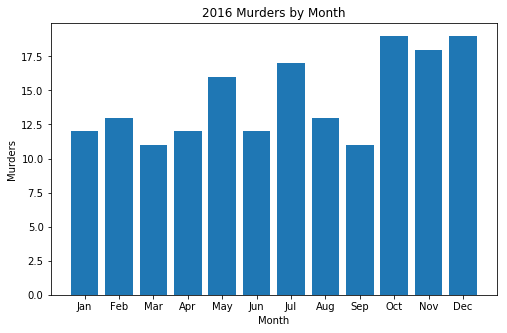

In [95]:
plt.figure(figsize=(8,5))
plt.title("2016 Murders by Month")
plt.xlabel("Month")
plt.ylabel("Murders")
plt.bar(months, y)

## I encourage each of you to learn to use Jupyter Notebooks and learn Python or R
**Resources**
- Anaconda.com (home to the best Jupyter distribution)
- Datacamp.com (Python and R training)
- Data-illustrator.com
- Datastudio.google.com
- Scrapinghub.com (Portia, Scrapy)

# Thank you.
## Questions?